# Task - Topic Modeling

#### Part 1 - Data Cleaning

In [99]:
# Manage imports
import pdfplumber
import spacy
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import openai
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer



nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/namanlalit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Iterate the pdfs from the directory
datasetDirectory = "dataset/doc"
data = []

for docIndex in range(1,33):
    # Get the current directory
    currDirectory = datasetDirectory
    currDirectory += str(docIndex)
    currDirectory += ".pdf"
    print(currDirectory)

    # Read the pdf
    pdf = pdfplumber.open(currDirectory)
    text = ""
    for pageIndex in range(0, len(pdf.pages)):
        page = pdf.pages[pageIndex]
        text += page.extract_text(x_tolerance=1, y_tolerance=3, layout=False, x_density=7.25, y_density=13)

    data.append(text)

dataset/doc1.pdf
dataset/doc2.pdf
dataset/doc3.pdf
dataset/doc4.pdf
dataset/doc5.pdf
dataset/doc6.pdf
dataset/doc7.pdf
dataset/doc8.pdf
dataset/doc9.pdf
dataset/doc10.pdf
dataset/doc11.pdf
dataset/doc12.pdf
dataset/doc13.pdf
dataset/doc14.pdf
dataset/doc15.pdf
dataset/doc16.pdf
dataset/doc17.pdf
dataset/doc18.pdf
dataset/doc19.pdf
dataset/doc20.pdf
dataset/doc21.pdf
dataset/doc22.pdf
dataset/doc23.pdf
dataset/doc24.pdf
dataset/doc25.pdf
dataset/doc26.pdf
dataset/doc27.pdf
dataset/doc28.pdf
dataset/doc29.pdf
dataset/doc30.pdf
dataset/doc31.pdf
dataset/doc32.pdf


### Titles of all the documents

In [3]:
#Extract title
titleList = []
for index in range(32):
    splittedDoc = data[index].split('\n')
    if(index == 0 or index == 3 or index == 15 or index == 16 or index == 17 or index == 18 or index == 20 or index == 21 or index == 25 or index == 29 or index == 30 or index == 31):
        titleList.append(splittedDoc[2] + " " + splittedDoc[3])
    elif (index == 1):
        titleList.append(splittedDoc[2] + " " +  splittedDoc[3] + " " + splittedDoc[4] + " " + splittedDoc[5])
    elif (index == 2 or index == 5 or index == 12):
        titleList.append(splittedDoc[3] + " " + splittedDoc[4] + " " +  splittedDoc[5])
    elif (index == 4 or index == 8 or index == 10):
        titleList.append(splittedDoc[0] + " " +  splittedDoc[1])
    elif (index == 6 or index == 11 or index == 13):
        titleList.append(splittedDoc[3] + " " +  splittedDoc[4])
    elif (index == 7 or index == 14 or index == 22 or index == 23):
        titleList.append(splittedDoc[1] + " " +  splittedDoc[2])
    elif (index == 9):
        titleList.append(splittedDoc[0] + "x " + splittedDoc[2])
    elif (index == 19):
        titleList.append(splittedDoc[0])
    elif (index == 24 or index == 26 or index == 27 or index == 28):
        titleList.append(splittedDoc[2])

for doc in range(len(titleList)):
    print("Document Number: ", doc+1)
    print("Title: ", titleList[doc])
    print()

Document Number:  1
Title:  Heat Production and RF Detection during Cathodic Polarization of Palladium in 0.1 M LiOD

Document Number:  2
Title:  Electromagnetic Emission in the kHz to GHz Range Associated with Heat Production During Electrochemical Loading of Deuterium into Palladium: A Summary and Analysis of Results Obtained by Different Research Groups

Document Number:  3
Title:  EXCESS HEAT PRODUCTION IN Pd/D DURING PERIODIC PULSE DISCHARGE CURRENT IN VARIOUS CONDITIONS

Document Number:  4
Title:  MATERIALS ISSUES OF LOADING DEUTERIUM INTO PALLADIUM AND THE ASSOCIATION WITH EXCESS HEAT PRODUCTION

Document Number:  5
Title:  Excess Heat Production and Nuclear Ash in PdO/Pd/PdO Heterostructure after Electrochemical Saturation with Deuterium

Document Number:  6
Title:  EFFECT OF BORON FOR THE HEAT PRODUCTION AT THE HEAVY WATER ELECTROLYSIS USING PALLADIUM CATHODE

Document Number:  7
Title:  Heat Production and Trial to Detect Nuclear Products from Palladium-Deuterium Electrolysi

### Abstracts of all the documents

In [4]:
#Abstract
abstractList = []

for index in range(32):
    splittedDoc = data[index].split('\n')
    if(index == 13):
        splittedDoc[10] = splittedDoc[10][11:]
        abstractList.append(" ".join(splittedDoc[10:24]))
    elif (index == 8 or index == 9 or index == 10 or index == 21):
        for i in range(len(splittedDoc)):
            if(splittedDoc[i].startswith('Abstract')):
                aInd = i
            if(splittedDoc[i] == '1. introduction' or splittedDoc[i] == '1. Introduction' or splittedDoc[i] == '1. _lntrnd_uction_' or splittedDoc[i] == 'Introduction' or splittedDoc[i] == '1. INTRODUCTION'  or splittedDoc[i] == '01. Introduction'):
                iInd = i
        splittedDoc[aInd] = splittedDoc[aInd][10:]
        abstractList.append(" ".join(splittedDoc[aInd:iInd]))
    else:
        for i in range(len(splittedDoc)):
            if(splittedDoc[i] == "Abstract" or splittedDoc[i] == "ABSTRACT"):
                aInd = i
            if(splittedDoc[i] == '1. introduction' or splittedDoc[i] == '1. Introduction' or splittedDoc[i] == '1. _lntrnd_uction_' or splittedDoc[i] == 'Introduction' or splittedDoc[i] == '1. INTRODUCTION'  or splittedDoc[i] == '01. Introduction'):
                iInd = i
        abstractList.append(" ".join(splittedDoc[aInd+1:iInd]))
    

for doc in range(len(abstractList)):
    print("Document Number: ", doc+1)
    print("Abstract: ", abstractList[doc])
    print()

Document Number:  1
Abstract:  The study of the Fleischmann–Pons Effect (FPE), i.e. the production of excess power production during electrochemical loading of deuterium in palladium (in the past labeled cold fusion) has had a notably multidisciplinary character, involving solid state and nuclear physics, material science, electrochemistry and other fields. Correlations between the material status and the occurrence of the effect as well as some changes in the electrochemical interface status have been observed. Although during the last two decades, in several calorimetric experiments the effect was observed to be well above the measurement uncertainty, the mechanism producing the excess power is not completely understood. So far, the lack of reproducibility has been responsible for the absence of a clear explanation of the phenomenon based on experimental apparatus designed to enhance the spectrum of information required to define the effect. Recently, In order to improve this aspect 

In [5]:
#Remove stop words
def removeStopWords(pdfText):
    #Create tokens
    token_list = []
    for token in pdfText:
        token_list.append(token.text)
    
    # Create list of word tokens after removing stopwords
    filteredText =[] 

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filteredText.append(word)

    filteredText = " ".join(filteredText)
    return filteredText

In [6]:
# Remove special or unusual characters
def removeSpecialOrUnusualCharacters(pdfText):
    result = re.sub('[^A-Za-z0-9]+', ' ', pdfText)
    result = " ".join([text for text in result.split(' ') if len(text)>2])
    return result

In [7]:
#Convert all text to lowercase
def convertToLowerCase(pdfText):
    token_list = pdfText.split(' ')
    result = []
    for word in token_list:
        result.append(word.lower())
        
    result = " ".join(result)
    return result

In [8]:
#Perform Lemmatization
def performLemmatization(pdfText):
    filteredText = []
    for word in nlp(pdfText):
        filteredText.append(word.lemma_)
    
    filteredText = " ".join(filteredText)
    return filteredText


In [9]:
def removeNumbers(filteredText):
    pattern = r'[0-9]'
    filteredTextUpdated = re.sub(pattern, '', filteredText)
    return filteredTextUpdated

## Data cleaning and preprocessing

In [11]:
# Data cleaning
cleanedData = []
cleanedDataForTFIDF = []
for pdfData in data:
    pdfText = nlp(pdfData)
    
    filteredText = removeStopWords(pdfText)
    filteredText = removeSpecialOrUnusualCharacters(filteredText)
    filteredText = convertToLowerCase(filteredText)
    filteredText = removeNumbers(filteredText)
    filteredTextForKeyWord = filteredText
    filteredText = performLemmatization(filteredText)
    
    cleanedData.append(filteredText)
    cleanedDataForTFIDF.append(filteredTextForKeyWord)

### Document Embeddings using Doc2vec

In [12]:
# Document preProcessing and creating Tagged Documents
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()),tags=[str(i)]) for i, doc in enumerate(cleanedData)]

# Training the Doc2vec model
model = Doc2Vec(vector_size=60, min_count=2, epochs=50)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# get the document vectors
doc2vecEmbeddings = [model.infer_vector(
    word_tokenize(doc.lower())) for doc in cleanedData]

#  print the document vectors
for i, doc in enumerate(cleanedData):
    print("Document", i)
    print("Vector:", doc2vecEmbeddings[i])
    print()

Document 0
Vector: [ -2.3349535    1.3152362   -3.5253224    6.4603767    2.6589482
   1.6361533  -10.146253    -0.90477186  -3.214442     2.857892
   1.4758041   -1.4088128    0.78301287  -5.3211336   -5.3883605
  -4.167237     2.1237204    6.6161346   -7.4882784   -2.8672545
   1.0301356    8.786713    -2.6380937    2.0307224    4.4646473
   2.7364523   -5.3026247   -6.420945    -0.9005937   -1.4196119
   1.2004029   -0.21144877   0.97212875  -3.7179103    3.321113
   2.456497     2.6203835  -11.564085     0.4765303    2.4229949
  -0.2729355   -3.2090993    2.6596258   -4.1142254    1.591996
  -5.3973866    2.844291     0.04162155   4.135921    -7.243623
   1.0868793    0.08771612  -1.9231057   -2.7854383    2.1899889
   5.6234674   -3.6180923    3.8318753    1.1460488   -4.0198383 ]

Document 1
Vector: [-0.12011583  6.408874    0.08917236  1.2765839  10.512785   -8.392267
  6.875772    2.4693065  -4.6398306  -4.497914   -0.7824458   2.4794233
 -5.7311673  -4.6255107  -7.44129    -0.

### Sentence Embeddings using Universal Sentence Encoder

In [13]:
#selecting the universal sentence encoder for embedding
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
sentenceEmbeddings = embed(cleanedData)
sentenceEmbeddingsArray = []

#  print the document vectors
for i, doc in enumerate(cleanedData):
    print("Document", i)
    print("Vector:", sentenceEmbeddings[i])
    sentenceEmbeddingsArray.append(sentenceEmbeddings[i])
    print()

Document 0
Vector: tf.Tensor(
[ 0.04531134 -0.04531196  0.04499147 -0.04510909 -0.04530723 -0.04531196
  0.04531196 -0.04531196 -0.04429873  0.04531196 -0.04531196 -0.04496558
  0.04517293 -0.04531196  0.04531144  0.02581074  0.04531121  0.04531196
 -0.00632969 -0.04531196  0.04508329  0.04530401  0.04528792  0.04531196
  0.04531196  0.04504907  0.04531196 -0.04531196 -0.04484526  0.01322195
 -0.04531196  0.03848248 -0.04531051 -0.04531196  0.04529451  0.04531196
 -0.04531196 -0.04531196  0.04530989 -0.04531196  0.04196346  0.04531196
 -0.04525784  0.04531129  0.04531196  0.04530816 -0.04531196  0.04531196
 -0.04464451  0.04522317 -0.04531126  0.04531196 -0.04531196  0.04531196
 -0.04531196 -0.04432886  0.04531196 -0.04176792 -0.04531196 -0.04495844
 -0.04531196 -0.04531196  0.04531196  0.04531196 -0.04531196 -0.04531196
  0.04531196  0.04531196  0.04531167 -0.04078361  0.04531196  0.04483628
  0.04521266  0.04531194 -0.04470059  0.04531196 -0.04528936 -0.04531196
 -0.04531196 -0.04531

### 2.b Cosine Similarity for 5 random documents

In [72]:
#Picking 5 random documents from the list
docArray = []
for i in range(32):
    docArray.append(i)

randomDocumentSeries = pd.Series(docArray)
randomDocuments = randomDocumentSeries.sample(5)
print(randomDocuments)


20    20
26    26
3      3
22    22
6      6
dtype: int64


In [73]:
# Helper Functions for computing cosine similarity
def calculateCosineSimilarity(documentMapping, randomEmbeddings):
    similarityMatrix = cosine_similarity(randomEmbeddings)

    top3Documents = calculateTopDocuments(documentMapping, similarityMatrix, randomEmbeddings)
    return top3Documents

def calculateTopDocuments(documentMapping, similarityMatrix, randomEmbeddings):
    # Flatten the upper triangular part (excluding diagonal)
    upper_triangular = np.triu(similarityMatrix, k=1).flatten()

    # Get the indices of the top three values
    top_indices = np.argpartition(upper_triangular, -3)[-3:]

    # Reshape the indices to get the corresponding pairs
    i, j = np.unravel_index(top_indices, similarityMatrix.shape)

    # Get the embeddings with highest similarity
    top_embeddings = [(i[k], j[k]) for k in range(3)]
    top_similarity_values = [upper_triangular[index] for index in top_indices]

    # Sort the top_embeddings based on their similarity values
    sorted_top_embeddings = sorted(zip(top_embeddings, top_similarity_values), key=lambda x: x[1], reverse=True)


    documentResultMap = []

    print("Top Embeddings Sorted by Cosine Similarity:")
    for (i, j), similarity_value in sorted_top_embeddings:
        # print(f"Embeddings {i} and {j}: Similarity Value = {similarity_value:.2f}")
        doc1 = documentMapping[str(randomEmbeddings[i])]
        doc2 = documentMapping[str(randomEmbeddings[j])]
        documentResultMap.append({doc1+1, doc2+1})

    return documentResultMap

In [74]:
# Calculating cosine similarity and finding out top 3 documents for Doc2vec Embeddings
randomEmbeddings = []
documentMapping = {}
for key, value in randomDocuments.items():
    documentMapping[str(doc2vecEmbeddings[key])] = key
    randomEmbeddings.append(doc2vecEmbeddings[key])

doc2vecDocumentList = calculateCosineSimilarity(documentMapping, randomEmbeddings)

print("Doc2Vec Embeddings picks these three documents as similar: ", doc2vecDocumentList)


Top Embeddings Sorted by Cosine Similarity:
Doc2Vec Embeddings picks these three documents as similar:  [{7, 23}, {4, 23}, {4, 21}]


In [75]:
# Calculating cosine similarity and finding out top 3 documents for Universal Sentence Embeddings
randomEmbeddings = []
documentMapping = {}
for key, value in randomDocuments.items():
    documentMapping[str(sentenceEmbeddingsArray[key])] = key
    randomEmbeddings.append(sentenceEmbeddingsArray[key])

universalEncoderDocumentList = calculateCosineSimilarity(documentMapping, randomEmbeddings)

print("Universal Sentence Encoder Embeddings picks these three documents as similar: ", universalEncoderDocumentList)


Top Embeddings Sorted by Cosine Similarity:
Universal Sentence Encoder Embeddings picks these three documents as similar:  [{27, 21}, {21, 7}, {27, 7}]


## Dimensionality Reduction

In [18]:
# Common function for performing dimensionality reduction using Principal Component Analysis (PCA)
def performPCA(embeddings):
    # number of components
    pca = PCA(n_components=30)

    # Fit the PCA model to your data
    pca.fit(embeddings)

    # Transform your data to the first two principal components
    transformedEmbeddings = pca.transform(embeddings)
    return transformedEmbeddings

In [19]:
# Dimensionality Reduction for Doc2Vec Embeddings
doc2vecEmbeddingsTransformed = performPCA(doc2vecEmbeddings)
print(doc2vecEmbeddingsTransformed)

[[ 1.78562556e+00 -9.62697481e+00 -1.86734764e+00 -6.04717643e+00
   3.32684086e+00 -5.41662440e+00  2.80409875e+00  7.42687423e+00
  -5.34631778e+00  7.08877274e+00 -3.51703286e+00 -4.64957454e-01
  -2.32038135e+00  1.46692778e+00 -1.06729206e+01  4.38390743e+00
   7.76103129e+00 -8.25440252e+00 -5.08976519e+00  4.19681651e-02
   5.79371829e+00  7.65100298e+00  2.90640498e+00 -3.24562659e+00
   2.27804348e+00 -3.63314565e+00  6.24789941e-01  3.03973684e+00
  -3.10481989e+00  1.72256974e+00]
 [-1.39213058e+00 -1.55016994e+01  1.38081913e+00  2.16693994e+00
   1.38232762e+00  5.25512184e-01  1.63513462e+01  2.02793674e+01
  -7.68017749e+00  1.48018224e+01  2.31284768e+00 -3.71312655e+00
  -6.88435105e+00  2.01238543e-01  5.64949614e+00  4.67539021e-01
  -4.10288302e+00  2.12330386e+00  3.07503491e+00  1.21914195e+00
  -3.43547943e+00 -2.42550423e+00 -1.22455404e+00  1.28991424e+00
   6.05759609e-03  6.43867967e-01 -2.14603630e-01 -2.96733851e+00
   1.45757162e+00  9.48254501e-03]
 [ 1.3

In [20]:
# Dimensionality Reduction for Universal Sentence Encoder Embeddings
sentenceEmbeddingsTransformed = performPCA(sentenceEmbeddings)
print(sentenceEmbeddingsTransformed)

[[ 2.50766492e-01  3.04486631e-01  3.96312997e-02 -8.04886704e-02
  -1.63133200e-01 -4.04467058e-02  6.58529579e-02  5.99554648e-02
  -9.44811937e-02 -1.78135109e-01  1.61311251e-01  3.01680845e-02
   3.78122665e-02  1.74975832e-02 -7.43448725e-02  7.06388522e-02
   4.98390412e-02  1.22198022e-01  2.59947441e-02  6.82107328e-02
   1.53215862e-02 -5.21080018e-02  1.43043648e-02 -1.71699190e-02
   3.07561132e-02  3.15199076e-03  1.26698591e-02  1.64442852e-03
   1.52923482e-02 -2.19846200e-02]
 [-1.45121912e-01 -1.34515394e-03  1.12060946e-01 -3.95398780e-02
   2.52715181e-01 -6.99276800e-02 -1.15986815e-01  1.31803196e-01
  -7.11963582e-02 -1.67385145e-01  1.08043272e-01 -5.24344375e-02
   5.84784920e-03 -1.24275562e-01  4.28861983e-02  6.85726684e-02
  -5.20798159e-02 -8.52004349e-02 -4.76827065e-02 -7.24746439e-02
  -3.71135442e-02 -2.10504140e-02 -5.05874067e-02  2.51607290e-02
  -8.91013878e-03 -1.94518810e-02  3.45664414e-02  2.08438908e-03
  -1.32773611e-02 -3.06689604e-02]
 [-3.1

## Data Clustering

### Determining Optimal number of clusters for Universal Sentence Encoder using Elbow Method

/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

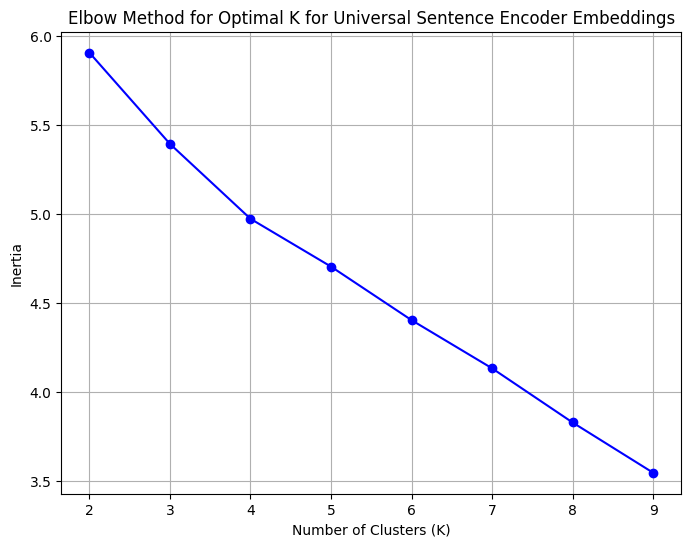

In [21]:
# Define a range of K values to test
k_values = list(range(2,10))  # Adjust the range as needed

# Initialize an empty list to store the inertia values
inertia = []

# Fit K-means models and calculate inertia for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sentenceEmbeddingsTransformed)  # Replace 'embeddings' with your data
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K for Universal Sentence Encoder Embeddings')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [22]:
# Based on the graph plotted above, the optimal number of clusters are 15
OptimalClustersForUniversalSentenceEncoder = 6

### Determining Number of clusters for Doc2Vec Embeddings using Elbow Method

/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.

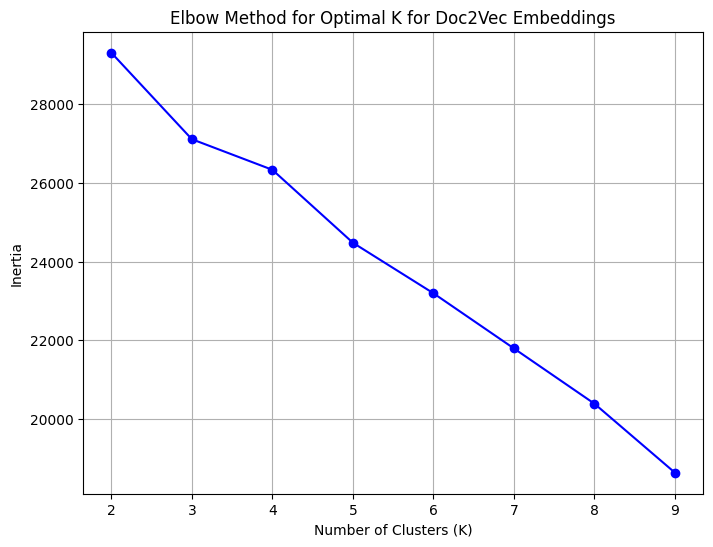

In [23]:
# Define a range of K values to test
k_values = list(range(2,10))  # Adjust the range as needed

# Initialize an empty list to store the inertia values
inertia = []

# Fit K-means models and calculate inertia for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(doc2vecEmbeddingsTransformed)  # Replace 'embeddings' with your data
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K for Doc2Vec Embeddings')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [24]:
# Based on the graph plotted above, the optimal number of clusters are 15
OptimalClustersForDoc2VecEmbeddings = 5

##### Helper functions for clustering

In [25]:
def calculateDistanceBetweenEmbeddings(embeddings, centroidEmbeddings, clusterLabelValues):
    result = []
    for values in clusterLabelValues:
        docNumber = values[0]
        if(len(values) > 1):
            docNumber = values[1]
        euclDistance = np.linalg.norm(embeddings[docNumber] - centroidEmbeddings)
        result.append([euclDistance, docNumber])
    
    # Sort the list in descending order based on the first value of each sub-array
    result = sorted(result, key=lambda x: x[0], reverse=True)
    return result

In [26]:
def performKMeansClusteringAndLabelMapping(numberOfClusters, embeddings):
    kmeans = KMeans(n_clusters=numberOfClusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)

    clusterCentroids = kmeans.cluster_centers_

    # Generating the cluster to document mapping
    clusterLabelToDocumentMapping = {}
    for i in range(numberOfClusters):
        clusterLabelToDocumentMapping[i] = []

    for i in range(len(cluster_labels)):
        clusterLabelToDocumentMapping[cluster_labels[i]].append([0, i])

    # Calculating distance between the centroids and each cluster embeddings
    for i in range(numberOfClusters):
        clusterLabelToDocumentMapping[i] = calculateDistanceBetweenEmbeddings(embeddings, clusterCentroids[i], clusterLabelToDocumentMapping[i])

    return clusterLabelToDocumentMapping

In [27]:
def getTopThreeDocumentsClusters(clusterLabelToDocumentMapping):
    # Pick the top 3 documents for each cluster
    clusterLabelToDocumentMappingFiltered = {}
    for key, value in clusterLabelToDocumentMapping.items():
        clusterLabelToDocumentMappingFiltered[key] = value[: min(len(value), 3)]

    return clusterLabelToDocumentMappingFiltered


In [63]:
def generateCSVFileData(clusterLabelMapping):
    dataDict = {
        "Cluster number": [],
        "Representative Documents": []
    }
    for key, value in clusterLabelMapping.items():
        docData = []
        for index in range(len(value)):
            docNumber = value[index][1]
            title = titleList[docNumber]
            abstract = abstractList[docNumber]
            docData.append(title + " " + abstract)
        dataDict["Cluster number"].append(key)
        dataDict["Representative Documents"].append(docData)
    return pd.DataFrame(dataDict)

### Running K-Means Clustering Algorithm for both the Embeddings (Universal Sentence Encoder and Doc2Vec)

In [64]:
# Generating the clusters for Universal Sentence Encoder
clusterLabelToDocumentMapUSE = performKMeansClusteringAndLabelMapping(OptimalClustersForUniversalSentenceEncoder, sentenceEmbeddingsTransformed)
clusterLabelMapForSentenceEmbeddings = getTopThreeDocumentsClusters(clusterLabelToDocumentMapUSE)
# print(clusterLabelMapForSentenceEmbeddings)



# Output the clusters in the CSV File
sentenceEncoderdf = generateCSVFileData(clusterLabelMapForSentenceEmbeddings)
sentenceEncoderdf

/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster number,Representative Documents
0,0,[Multifunctional Ion Beam Installation “HELIS”...
1,1,[Electromagnetic Emission in the kHz to GHz Ra...
2,2,[Nickel Transmutation and Excess Heat Model us...
3,3,[Upper Bound in the Fusion Products and Transm...
4,4,[RESEARCH INTO CHARACTERISTICS OF X-RAY EMISSI...
5,5,[Is the Abundance of Elements in Earth’s Crust...


In [65]:
# Generating the clusters for Doc2Vec
clusterLabelToDocumentMapDoc2Vec = performKMeansClusteringAndLabelMapping(OptimalClustersForDoc2VecEmbeddings, doc2vecEmbeddingsTransformed)
clusterLabelMapForDoc2VecEmbeddings = getTopThreeDocumentsClusters(clusterLabelToDocumentMapDoc2Vec)


# Output the clusters in the CSV File
doc2Vecdf = generateCSVFileData(clusterLabelMapForDoc2VecEmbeddings)
doc2Vecdf

/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster number,Representative Documents
0,0,[LENR Transmutation of Stable Sr and K Isotope...
1,1,[Nickel Transmutation and Excess Heat Model us...
2,2,[Integrated approach for high resolution surfa...
3,3,[Excess Heat Production and Nuclear Ash in PdO...
4,4,[EXCESS HEAT PRODUCTION IN Pd/D DURING PERIODI...


### Visualising the Clusters

#### Universal Sentence Encoded Documents Visualisation

/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Visualization of Universal Sentence Encoder Documents')

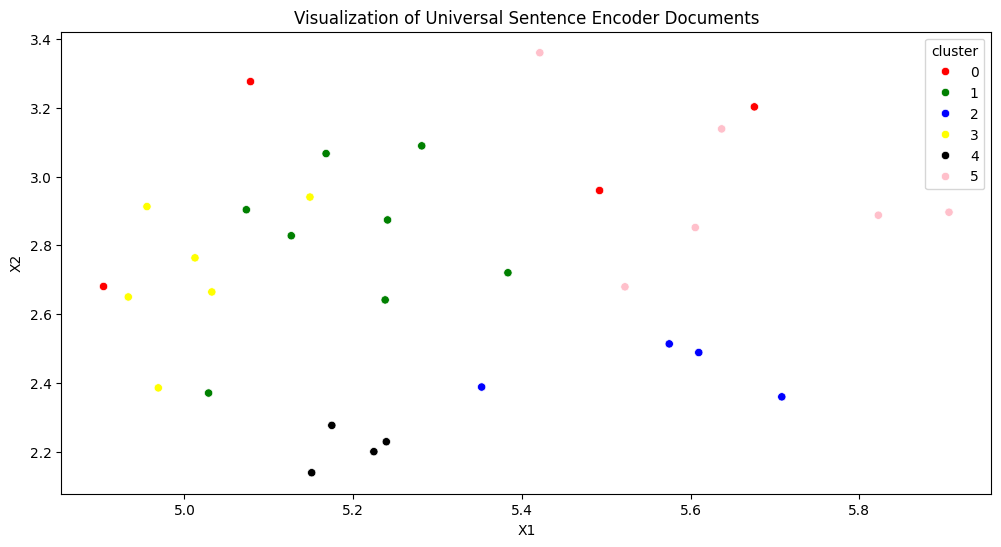

In [50]:
# Plotting the TSNE for Universal Sentence Encoder
kmeansUSE = KMeans(n_clusters=OptimalClustersForUniversalSentenceEncoder, random_state=42)
cluster_labels_use = kmeansUSE.fit_predict(sentenceEmbeddingsTransformed)


Xtsne = TSNE(n_components=2).fit_transform(sentenceEmbeddingsTransformed)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = cluster_labels_use
dftsne.columns = ['X1', 'X2' ,'cluster']
fig, ax = plt.subplots(1, 1, figsize=(12,6))
custom_palette = {0: "red", 1: "green", 2: "blue", 3: "yellow", 4: "black", 5: "pink"}
sns.scatterplot(data=dftsne,x='X1',y='X2',hue='cluster',legend="full",alpha=1,ax=ax, palette=custom_palette)
ax.set_title('Visualization of Universal Sentence Encoder Documents')

#### Doc2Vec Embedded Documents Visualisation

/Users/namanlalit/anaconda3/envs/topicPA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Visualization of Doc2Vec Embedded Documents')

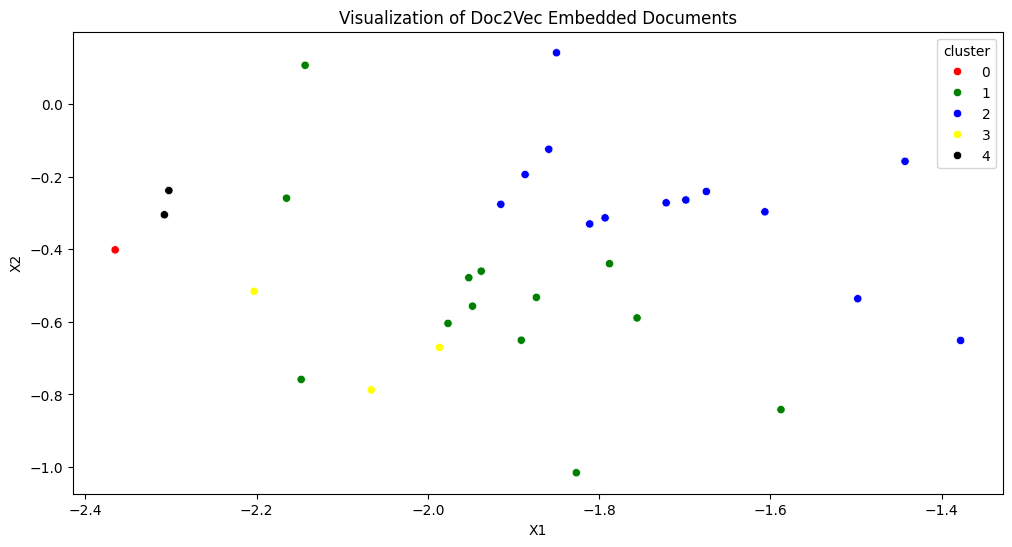

In [51]:
# Plotting the TSNE for Doc2Vec
kmeansDoc2Vec = KMeans(n_clusters=OptimalClustersForDoc2VecEmbeddings, random_state=42)
cluster_labels_doc2vec = kmeansDoc2Vec.fit_predict(doc2vecEmbeddingsTransformed)


Xtsne = TSNE(n_components=2).fit_transform(doc2vecEmbeddingsTransformed)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = cluster_labels_doc2vec
dftsne.columns = ['X1', 'X2' ,'cluster']
fig, ax = plt.subplots(1, 1, figsize=(12,6))
custom_palette = {0: "red", 1: "green", 2: "blue", 3: "yellow", 4: "black"}
sns.scatterplot(data=dftsne,x='X1',y='X2',hue='cluster',legend="full",alpha=1,ax=ax, palette=custom_palette)
ax.set_title('Visualization of Doc2Vec Embedded Documents')

## Applying TF-IDF on the clusters

In [52]:
# Generate TF-IDF matrix
def generateTfIdfMatrix(clusterLabelMap):
    tfIdfMatrix = []
    for key, value in clusterLabelMap.items():
        tfIdfData = ""
        for index in range(len(value)):
            docNumber = value[index][1]
            tfIdfData += (" " + cleanedDataForTFIDF[docNumber])
        tfIdfMatrix.append(tfIdfData)
    return tfIdfMatrix

In [53]:
# Function to generate the top keywords using tfIdf
def getTopKeywordsFromClusters(tfIdfMatrix):
  vectorizer = TfidfVectorizer(use_idf=True, max_df=0.5,min_df=1, ngram_range=(1,3))
  vectors = vectorizer.fit_transform(tfIdfMatrix)

  dict_of_tokens={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
  tfidf_vectors = []  # all deoc vectors by tfidf
  for row in vectors:
    tfidf_vectors.append({dict_of_tokens[column]:value for (column,value) in zip(row.indices,row.data)})


  doc_sorted_tfidfs =[]  # list of doc features each with tfidf weight
  #sort each dict of a document
  for dn in tfidf_vectors:
    newD = sorted(dn.items(), key=lambda x: x[1], reverse=True)
    newD = dict(newD)
    doc_sorted_tfidfs.append(newD)


  tfidf_kw = [] # get the keyphrases as a list of names without tfidf values
  for doc_tfidf in doc_sorted_tfidfs:
      ll = list(doc_tfidf.keys())
      tfidf_kw.append(ll)

  return tfidf_kw


#### Generate Top Keywords for Universal Sentence Encoder Embedded Data Clusters

In [61]:
tfIdfMatrixUSE = generateTfIdfMatrix(clusterLabelMapForSentenceEmbeddings)
topKeywordForUSE = getTopKeywordsFromClusters(tfIdfMatrixUSE)

for ind in range(len(topKeywordForUSE)):
    print("Cluster number: ", ind)
    print("Top 6 Keywords: ", topKeywordForUSE[ind][0:6])

Cluster number:  0
Top 6 Keywords:  ['pdo', 'track', 'track diameter', 'detector', 'alpha', 'tidx']
Cluster number:  1
Top 6 Keywords:  ['frequencies', 'ghz', 'ni', 'cells', 'application', 'dwc']
Cluster number:  2
Top 6 Keywords:  ['ni', 'sn', 'reversible', 'equilibrium', 'lanp', 'ppm']
Cluster number:  3
Top 6 Keywords:  ['graphite', 'cop', 'kanthal', 'chl', 'loss', 'ni']
Cluster number:  4
Top 6 Keywords:  ['discharge', 'plasma electrolysis', 'input voltage', 'laser', 'glow discharge', 'glow']
Cluster number:  5
Top 6 Keywords:  ['earth', 'abundance', 'correlation', 'data sets', 'transmutation data', 'ho']


In [70]:
topKeywordForUSE = [x[0:6] for x in topKeywordForUSE]
sentenceEncoderdf["Top Keywords"] = topKeywordForUSE
sentenceEncoderdf.to_csv("cluster_info_universalSentenceEncoder.csv", index = False)

#### Generate Top Keywords for Doc2Vec Embedded Data Clusters

In [68]:
tfIdfMatrixDoc2Vec = generateTfIdfMatrix(clusterLabelMapForDoc2VecEmbeddings)
topKeywordForDoc2Vec = getTopKeywordsFromClusters(tfIdfMatrixDoc2Vec)

for ind in range(len(topKeywordForDoc2Vec)):
    print("Cluster number: ", ind)
    print("Top 6 Keywords: ", topKeywordForDoc2Vec[ind][0:6])

Cluster number:  0
Top 6 Keywords:  ['association', 'calcium', 'isotope', 'biomass', 'vysotskii', 'kornilova']
Cluster number:  1
Top 6 Keywords:  ['he', 'femto', 'ni', 'decay', 'sn', 'pd']
Cluster number:  2
Top 6 Keywords:  ['excess power', 'fib', 'nano', 'electrolyte', 'application', 'cop']
Cluster number:  3
Top 6 Keywords:  ['pdo', 'track diameter', 'track', 'detector', 'alpha', 'detectors']
Cluster number:  4
Top 6 Keywords:  ['discharge current', 'rays', 'medium', 'laser', 'ray laser', 'bursts']


In [71]:
topKeywordForDoc2Vec = [x[0:6] for x in topKeywordForDoc2Vec]
doc2Vecdf["Top Keywords"] = topKeywordForDoc2Vec
doc2Vecdf.to_csv("cluster_info_doc2vec.csv", index = False)

### Generating the Topic Representations using ChatGPT API

In [98]:
openai.api_key = "test"

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message["content"]

#### Doc2Vec Embeddings Topic Representations

In [91]:
# Generating Topic Representation for Doc2Vec Embeddings Keywords
for clusterNumber in range(len(doc2Vecdf['Cluster number'])):
    prompt = "I have a cluster of documents in the form of an array that is comprised of the titles and abstracts of multiple research papers appended together. The document array is {}. Along with this input, I have the top keywords extracted by reading the entire set of these documents in an array: {}. Can you give me a single topic representation from this data using the top keywords and the document arrays provided as the input?".format(doc2Vecdf['Representative Documents'][clusterNumber], doc2Vecdf['Top Keywords'][clusterNumber])
    response = get_completion(prompt)
    print(response)

Based on the provided document array and top keywords, a possible single topic representation could be:

Topic: "Biological Transmutation of Radioactive Isotopes in Microbiological Syntrophic Associations"

This topic encompasses the keywords "association," "isotope," and "biomass" from the top keywords list. It relates to the research papers' focus on the transmutation of stable and radioactive isotopes using microbiological cultures and syntrophic associations. The specific examples mentioned in the document array include the transmutation of Cs137 and Sr90 isotopes to stable analogs. The utilization of radionuclides and the role of biological systems in nuclear reactions are also mentioned.
Based on the provided document array and top keywords, a possible single topic representation could be "Transmutation and Excess Heat in Cold Fusion". This topic encompasses the keywords 'he' (representing helium, a product of fusion), 'femto' (related to femto-atoms and femto-molecules, which ar

#### Universal Sentence Encoder Embeddings Topic Representations

In [ ]:
# Generating Topic Representation for Universal Sentence Encoder Embeddings Keywords
for clusterNumber in range(len(sentenceEncoderdf['Cluster number'])):
    prompt = "I have a cluster of documents in the form of an array that is comprised of the titles and abstracts of multiple research papers appended together. The document array is {}. Along with this input, I have the top keywords extracted by reading the entire set of these documents in an array: {}. Can you give me a single topic representation from this data using the top keywords and the document arrays provided as the input?".format(sentenceEncoderdf['Representative Documents'][clusterNumber], sentenceEncoderdf['Top Keywords'][clusterNumber])
    response = get_completion(prompt)
    print(response)